# Welcome to the Future :)
Notebook by Rayce Stipanovich

This is a Python Jupyter Notebook designed to output low-poly .gltf files for use in 3D content or web stuff.

### Relies on:
- Python v3, Jupyter Notebooks
- NVIDIA CUDA v11.7 (or your CPU if you're a noob)
- OpenAI's Point-E Beta
- Blender w/ .gltf Exporter extension

### Installation and First-Time-Setup
1. Make sure you have [Python 3 installed.](https://www.python.org/downloads/)
2. Install the the [NVIDIA CUDA drivers v11.7](https://developer.nvidia.com/cuda-11-7-0-download-archive)
3. Install the [Python VSCode Extension](https://marketplace.visualstudio.com/items?itemName=ms-python.python)
4. Install the [Jupyter VSCode Extension](https://marketplace.visualstudio.com/items?itemName=ms-toolsai.jupyter)
5. Install [Blender](https://www.blender.org/download/) if you want GLTF Conversion
6. Follow the rest of the instructions below...

___

## First-Time Setup (Continued)
Run the pip installer to install the [CUDA 11.7 version of PyTorch](https://pytorch.org/get-started/locally/) along with the other dependanceis Point-E Needs.

In [14]:
# install dependencies with pip install
%pip install -e .

Obtaining file:///C:/Users/Rayce/point_e/point-e
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Cloning https://github.com/openai/CLIP.git to c:\users\rayce\appdata\local\temp\pip-install-eu63a4ll\clip_2872bf99120b4f9eb1c703f1a8fc9ef4
  Resolved https://github.com/openai/CLIP.git to commit d50d76daa670286dd6cacf3bcd80b5e4823fc8e1
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: point-e
    Found existing installation: point-e 0.0.0
    Uninstalling point-e-0.0.0:
      Successfully uninstalled point-e-0.0.0
  Running setup.py develop for point-e
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git 'C:\Users\Rayce\AppData\Local\Temp\pip-install-eu63a4ll\clip_2872bf99120b4f9eb1c703f1a8fc9ef4'


You can skip this next step if you don't have an NVIDIA GPU.  This will make sure we have the correct version of PyTorch 

In [15]:
# pip install pytorch w/ cuda 11.7
%pip uninstall torch -y
%pip install torch --force-reinstall --extra-index-url https://download.pytorch.org/whl/cu117

Found existing installation: torch 1.13.1+cu117
Uninstalling torch-1.13.1+cu117:
  Successfully uninstalled torch-1.13.1+cu117
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2544.0_x64__qbz5n2kfra8p0\lib\site-packages\pip\_internal\cli\base_command.py", line 160, in exc_logging_wrapper
    status = run_func(*args)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2544.0_x64__qbz5n2kfra8p0\lib\site-packages\pip\_internal\commands\uninstall.py", line 103, in run
    uninstall_pathset.commit()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2544.0_x64__qbz5n2kfra8p0\lib\site-packages\pip\_internal\req\req_uninstall.py", line 424, in commit
    self._moved_paths.commit()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2544.0_x64__qbz5n2kfra8p0\lib\site-packages\pip\_internal\req\req_uninstall.py", line 277, in commit
    save_dir.cleanup()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2544.0_x64__qbz5n2kfra8p

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117
  Using cached https://download.pytorch.org/whl/cu117/torch-1.13.1%2Bcu117-cp310-cp310-win_amd64.whl (2255.4 MB)
  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfully uninstalled typing_extensions-4.4.0
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


#### STOP!  
You may need to "restart" the kernel if you're having errors past this point.  There should be a Restart button towards the top center of the notebook.  Restarting can also undo what we just installed, so try and see what works if one way or the other doesn't for you.

___

# START HERE EVERY TIME YOU LAUNCH
Next, run these chunks to import the dependances we just installed into our script we're building...  This loads up PyTorch and the Point-E Code for us.

If you get an error saying `"IProgress not found. Please update jupyter and ipywidgets."`, just ignore it for now.  Restarting may fix, but it also might mean you need to run those two `%pip install` steps again.

In [45]:
# Import PyTorch and Point-E Libs...
from PIL import Image
import random
import torch
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import plotly.io as pio
pio.renderers.default = "vscode"
import plotly.graph_objects as go

from point_e.diffusion.configs import DIFFUSION_CONFIGS, diffusion_from_config
from point_e.diffusion.sampler import PointCloudSampler
from point_e.models.download import load_checkpoint
from point_e.models.configs import MODEL_CONFIGS, model_from_config
from point_e.util.pc_to_mesh import marching_cubes_mesh
from point_e.util.plotting import plot_point_cloud
from point_e.util.point_cloud import PointCloud
print("OK: PyTorch Version:", torch.__version__)

OK: PyTorch Version: 1.13.1+cu117


### STOP
Sanity check that CUDA is working on the GPU.... otherwise this will take forever...
If you see CPU, then HMU to help debug.  You should see CUDA here!

Something Like...

    Using NVIDIA CUDA with PyTorch: v1.13.1+cu117 and CUDA: v11.7

In [17]:
# Check if GPU is available
if torch.cuda.is_available():
   print('Using NVIDIA CUDA with PyTorch: v'+torch.__version__+' and CUDA: v'+torch.version.cuda)
else:
   print('Using CPU with PyTorch: v'+torch.__version__)
print("\nNVCC Version:")
!nvcc --version

Using NVIDIA CUDA with PyTorch: v1.13.1+cu117 and CUDA: v11.7

NVCC Version:
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Jun__8_16:59:34_Pacific_Daylight_Time_2022
Cuda compilation tools, release 11.7, V11.7.99
Build cuda_11.7.r11.7/compiler.31442593_0


___

### One-Time-Setup after Launch and CUDA is OK.
Import the ML Models into the GPU and initialize the point cloud.  Run these once after you get torch with CUDA up and running.

Here is where we also say what version of Blender we would like to use to convet the .ply model intermediates into .gltf files.

Run this code if you want to generate or convert meshes with blender.

In [24]:
# Setup Blender Converter
blender_version = 3.0
blender_path = "C:\Program Files\Blender Foundation\Blender "+str(blender_version)+"\\blender.exe"

# Check if Blender is installed
with open(blender_path, "r"):
    print("OK: Blender Path:", blender_path)
print("Using Blender Version:", blender_version)

OK: Blender Path: C:\Program Files\Blender Foundation\Blender 3.0\blender.exe
Using Blender Version: 3.0


Start the ML model by downloading the models onto the GPU and pulling the checkpoint training data.

In [25]:
# Unpack Preapre the ML models on the GPU or CPU...
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('creating base model...')
base_name = 'base40M-textvec'
base_model = model_from_config(MODEL_CONFIGS[base_name], device)
base_model.eval()
base_diffusion = diffusion_from_config(DIFFUSION_CONFIGS[base_name])

print('creating upsample model...')
upsampler_model = model_from_config(MODEL_CONFIGS['upsample'], device)
upsampler_model.eval()
upsampler_diffusion = diffusion_from_config(DIFFUSION_CONFIGS['upsample'])

print('creating SDF model...')
sdf_model = model_from_config(MODEL_CONFIGS['sdf'], device)
sdf_model.eval()

print('downloading base checkpoint...')
base_model.load_state_dict(load_checkpoint(base_name, device))

print('downloading upsampler checkpoint...')
upsampler_model.load_state_dict(load_checkpoint('upsample', device))

print('downloading SDF checkpoint...')
sdf_model.load_state_dict(load_checkpoint('sdf', device))

creating base model...
creating upsample model...
creating SDF model...
downloading base checkpoint...
downloading upsampler checkpoint...
downloading SDF checkpoint...


<All keys matched successfully>

In [26]:
# Initialize the point cloud sampler
sampler = PointCloudSampler(
    device=device,
    models=[base_model, upsampler_model],
    diffusions=[base_diffusion, upsampler_diffusion],
    num_points=[1024, 4096 - 1024],
    aux_channels=['R', 'G', 'B'],
    guidance_scale=[3.0, 0.0],
    model_kwargs_key_filter=('texts', ''), # Do not condition the upsampler at all
)
print("Point Cloud Sampler Initialized")

Point Cloud Sampler Initialized


___

### THE FUN PART!!!
Keep Re-Running this code afterwards to generate new models based on your prompt.  Remember to re-run the prompt chunk below toa ctually update the prompt on the model!

130it [00:26,  4.91it/s]


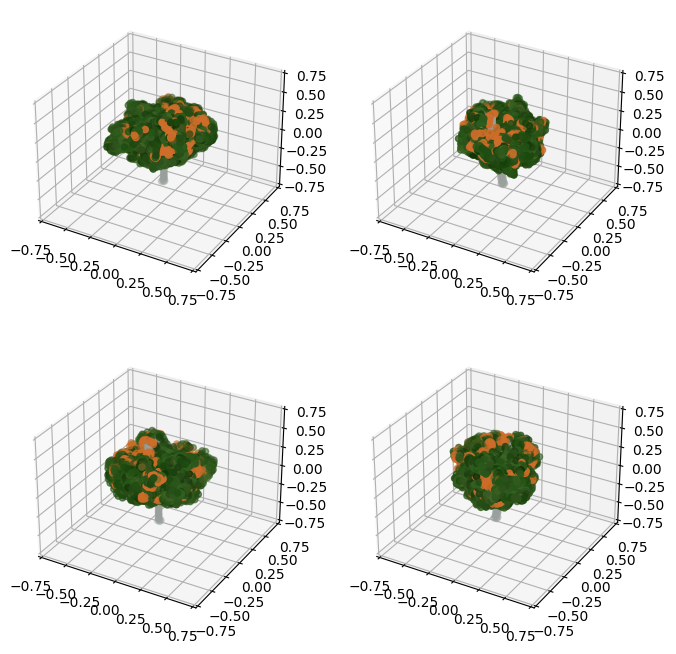

In [46]:
# Set a prompt to condition on.
prompt = 'apple tree'

# Produce a sample from the model.
samples = None
for x in tqdm(sampler.sample_batch_progressive(batch_size=1, model_kwargs=dict(texts=[prompt]))):
    samples = x
    
# Generate the point cloud and plot it.
pc = sampler.output_to_point_clouds(samples)[0]
fig = plot_point_cloud(pc, grid_size=2, fixed_bounds=((-0.75, -0.75, -0.75),(0.75, 0.75, 0.75)))

Look at the 3D Point Cloud Data

In [51]:
# Setup a plotly figure
fig_plotly = go.Figure(
   data=[
      go.Scatter3d(
         x=pc.coords[:, 0],y=pc.coords[:, 1],z=pc.coords[:, 2],
         mode='markers',
         marker=dict(
            size=5,
            color=['rgb({},{},{})'.format(r,g,b) for r,g,b in zip(pc.channels['R'], pc.channels['G'], pc.channels['B'])],
         )
      )
   ],
   layout=dict(
      scene=dict(
         bgcolor="rgb(30, 30, 30)",
         xaxis=dict(visible=False),
         yaxis=dict(visible=False),
         zaxis=dict(visible=False),
      )
   ),  
)

# Render the plotly figure
fig_plotly.show(renderer="browser")

If the Above output looks good, run the next two to output a .gltf in the outputs folder.

In [42]:
# Produce a mesh (with vertex colors) from the point cloud. and write it to a PLY file.
mesh = marching_cubes_mesh(
    pc=pc,
    model=sdf_model,
    batch_size=4096,
    grid_size=128, # increase to 128 for resolution used in evals - 32 is faster
    progress=True,
)

newP = prompt.replace(" ", "_") + "_" + str(random.randint(1, 1000000))
fileName = 'intermediates/'+newP+".ply"

# Write the mesh to a PLY file to import into some other program.
with open(fileName, 'wb') as f:
    mesh.write_ply(f)
    
print("Generated mesh saved to: "+fileName)

100%|██████████| 512/512 [00:11<00:00, 46.13it/s]


Generated mesh saved to: intermediates/apple_tree_349049.ply


In [ ]:
# Convert the .ply file to embedded .gltf file using Blender
!"$blender_path" -b -P 2gltf2.py -- "$fileName"
outputName = fileName.replace(".ply",".gltf").replace("intermediates/","outputs/")
print("\n============================================\n\n   .gltf file exported successfully! :)")
print("\n\n at the path: " + outputName)
print("\n\n============================================")

Great!  You should now have a .ply or a .gltf model!

You can preview them with the 3D viewer in windows, or at [3DViewer.net](https://3DViewer.net) on a mac.

# BDE ♥
(Best Day Ever!!!)